In [1]:
import pandas as pd
df_git = pd.read_csv("Github_survey_r2.csv",low_memory=False)
column_headers = list(df_git.columns.values)
b=len(column_headers)
print("Number of attributes =  ", b)
j=1
for x in column_headers:
    print(j,"   ", x )
    j=j+1

Number of attributes =   93
1     RESPONSE_ID
2     DATE_SUBMITTED
3     STATUS
4     PARTICIPATION_TYPE_FOLLOW
5     PARTICIPATION_TYPE_USE_APPLICATIONS
6     PARTICIPATION_TYPE_USE_DEPENDENCIES
7     PARTICIPATION_TYPE_CONTRIBUTE
8     PARTICIPATION_TYPE_OTHER
9     CONTRIBUTOR_TYPE_CONTRIBUTE_CODE
10     CONTRIBUTOR_TYPE_CONTRIBUTE_DOCS
11     CONTRIBUTOR_TYPE_PROJECT_MAINTENANCE
12     CONTRIBUTOR_TYPE_FILE_BUGS
13     CONTRIBUTOR_TYPE_FEATURE_REQUESTS
14     CONTRIBUTOR_TYPE_COMMUNITY_ADMIN
15     EMPLOYMENT_STATUS
16     PROFESSIONAL_SOFTWARE
17     FUTURE_CONTRIBUTION_INTEREST
18     FUTURE_CONTRIBUTION_LIKELIHOOD
19     OSS_USER_PRIORITIES_LICENSE
20     OSS_USER_PRIORITIES_CODE_OF_CONDUCT
21     OSS_USER_PRIORITIES_CONTRIBUTING_GUIDE
22     OSS_USER_PRIORITIES_CLA
23     OSS_USER_PRIORITIES_ACTIVE_DEVELOPMENT
24     OSS_USER_PRIORITIES_RESPONSIVE_MAINTAINERS
25     OSS_USER_PRIORITIES_WELCOMING_COMMUNITY
26     OSS_USER_PRIORITIES_WIDESPREAD_USE
27     OSS_CONTRIBUTOR_PRIORITI

In [2]:
# Analysing all 6 behavior attributes values together

print("counting NA in 6 behavior columns")
a1 = len(df_git)
print('Total records in the dataset = ',a1)
a2=df_git[['DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE','DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION',
       'DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE','DISCOURAGING_BEHAVIOR_BAD_DOCS','DISCOURAGING_BEHAVIOR_CONFLICT',
       'DISCOURAGING_BEHAVIOR_UNWELCOMING_LANGUAGE']].isna().all(axis=1).sum()
print('Total records where at least one of the behaviour attributes is NOT NA =', a1-a2)

a3 = df_git['STATUS'].value_counts()['Partial']

print("Partial records = ",a3)
a4 = df_git[(df_git['DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE'] == 'No') & (df_git['DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION'] == 'No') 
           & (df_git['DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE'] == 'No')& (df_git['DISCOURAGING_BEHAVIOR_BAD_DOCS'] == 'No')
           & (df_git['DISCOURAGING_BEHAVIOR_CONFLICT'] == 'No')& (df_git['DISCOURAGING_BEHAVIOR_UNWELCOMING_LANGUAGE'] == 'No')]

print("Total records in where all 6 behaviour attributes are NO = ",len(a4))



counting NA in 6 behavior columns
Total records in the dataset =  6029
Total records where at least one of the behaviour attributes is NOT NA = 3834
Partial records =  2283
Total records in where all 6 behaviour attributes are NO =  132


In [3]:
# adding FINAL BEHAVIOUR column to dataset
df_git['Behaviour'] = None

# Removing rows with STATUS attribute value PARTIAL
df_git.drop(df_git[df_git['STATUS'] == 'Partial'].index, inplace = True)

print("total Records after removing partial status rows from dataset = ", len(df_git))

a5=df_git[['DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE','DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION',
       'DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE','DISCOURAGING_BEHAVIOR_BAD_DOCS','DISCOURAGING_BEHAVIOR_CONFLICT',
       'DISCOURAGING_BEHAVIOR_UNWELCOMING_LANGUAGE']].isna().all(axis=1).sum()

print('Total records where at all behaviour attributes is NA =', a5)

a6 = df_git[(df_git['DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE'] == 'No') & (df_git['DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION'] == 'No') 
           & (df_git['DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE'] == 'No')& (df_git['DISCOURAGING_BEHAVIOR_BAD_DOCS'] == 'No')
           & (df_git['DISCOURAGING_BEHAVIOR_CONFLICT'] == 'No')& (df_git['DISCOURAGING_BEHAVIOR_UNWELCOMING_LANGUAGE'] == 'No')]

print("Total records in where all 6 behaviour attributes are NO = ",len(a6))

# Putting value '0' if all of the 6 behaviour attribures are NO

df_git.loc[(df_git['DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE'] == 'No') & (df_git['DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION'] == 'No') 
           & (df_git['DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE'] == 'No')& (df_git['DISCOURAGING_BEHAVIOR_BAD_DOCS'] == 'No')
           & (df_git['DISCOURAGING_BEHAVIOR_CONFLICT'] == 'No')& (df_git['DISCOURAGING_BEHAVIOR_UNWELCOMING_LANGUAGE'] == 'No'), 'Behaviour'] = 0

# Putting value '1' if any of 6 behaviour attribures is YES

df_git.loc[(df_git['DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE'] == 'Yes') | (df_git['DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION'] == 'Yes') 
           | (df_git['DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE'] == 'Yes') | (df_git['DISCOURAGING_BEHAVIOR_BAD_DOCS'] == 'Yes')
           | (df_git['DISCOURAGING_BEHAVIOR_CONFLICT'] == 'Yes') | (df_git['DISCOURAGING_BEHAVIOR_UNWELCOMING_LANGUAGE'] == 'Yes'), 'Behaviour'] = 1

# Putting value '0' if all of the 6 behaviour attribures are NA/NaN

df_git['Behaviour'] = df_git['Behaviour'].fillna(0)

print(df_git['Behaviour'].value_counts())

total Records after removing partial status rows from dataset =  3746
Total records where at all behaviour attributes is NA = 34
Total records in where all 6 behaviour attributes are NO =  124
1    3586
0     160
Name: Behaviour, dtype: int64


Yes =  2931 No =  758 total =  3689


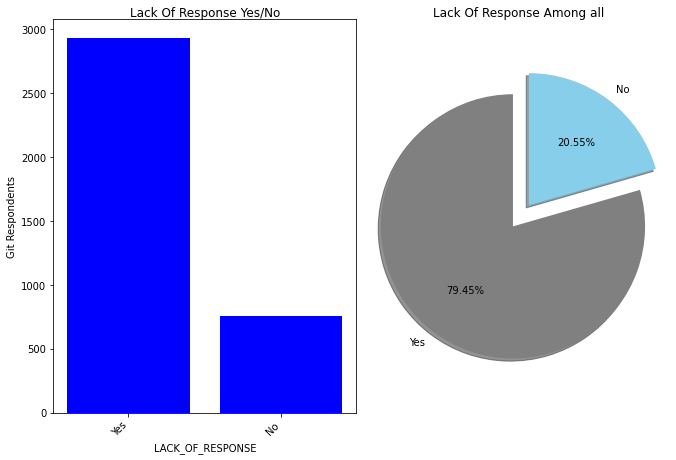

In [4]:
# some graphs 
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [9.50, 6.50]
plt.rcParams["figure.autolayout"] = True

plt.subplot(1, 2, 1)
plt.bar(df_git.DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE.dropna().unique(),df_git.DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE.value_counts(), color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('LACK_OF_RESPONSE')
plt.ylabel('Git Respondents')
plt.title('Lack Of Response Yes/No', pad=0)

b=len(df_git)
b1= df_git['DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE'].value_counts().to_dict()
x1=b1.get('Yes')
x2=b1.get('No')

print("Yes = ", x1, "No = ", x2, "total = ", x1+x2 )
labels= ['Yes', 'No']
colors=['gray', 'Skyblue']
sizes= [x1, x2]
# Draw second subplot using plt.subplot
plt.subplot(1, 2, 2)
plt.pie(sizes,labels=labels, colors=colors, startangle=90,shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.title('Lack Of Response Among all', pad=0)

plt.show()

Yes =  1167 No =  2503 Total =  3670


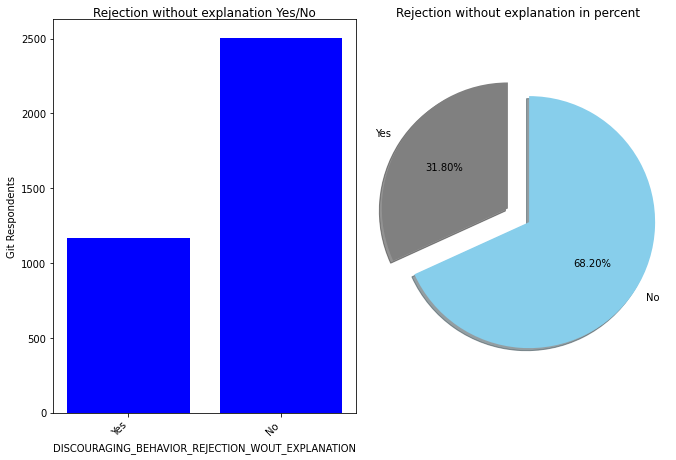

In [5]:
plt.rcParams["figure.figsize"] = [9.50, 6.50]
plt.rcParams["figure.autolayout"] = True
#print()
plt.subplot(1, 2, 1)
plt.bar(df_git.DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION.dropna().unique(),df_git.DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION.value_counts(ascending=True), color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION')
plt.ylabel('Git Respondents')
plt.title('Rejection without explanation Yes/No', pad=0)

b=len(df_git)
b1= df_git['DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION'].value_counts().to_dict()

x3=b1.get('Yes')
x4=b1.get('No')

print("Yes = ", x3, "No = ", x4, "Total = " , x3+x4)
labels= ['Yes', 'No']
colors=['gray', 'Skyblue']
sizes= [x3, x4]
# Draw second subplot using plt.subplot
plt.subplot(1, 2, 2)
plt.pie(sizes,labels=labels, colors=colors, startangle=90,shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.title('Rejection without explanation in percent', pad=0)

plt.show()

Yes =  2127 No =  1546 Total =  3673


Text(0.5, 1.0, 'Dismissive Response in percent')

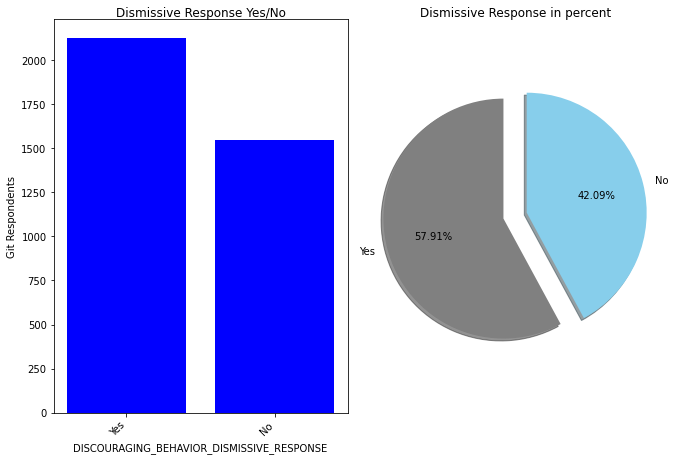

In [6]:
plt.rcParams["figure.figsize"] = [9.50, 6.50]
plt.rcParams["figure.autolayout"] = True
#print()
plt.subplot(1, 2, 1)
plt.bar(df_git.DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE.dropna().unique(),df_git.DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE.value_counts(ascending=False), color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE')
plt.ylabel('Git Respondents')
plt.title('Dismissive Response Yes/No', pad=0)

b=len(df_git)
b1= df_git['DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE'].value_counts().to_dict()

x5=b1.get('Yes')
x6=b1.get('No')

print("Yes = ", x5, "No = ", x6, "Total = ", x5+x6)
labels= ['Yes', 'No']
colors=['gray', 'Skyblue']
sizes= [x5, x6]
# Draw second subplot using plt.subplot
plt.subplot(1, 2, 2)
plt.pie(sizes,labels=labels, colors=colors, startangle=90,shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.title('Dismissive Response in percent', pad=0)


Yes =  3455 No =  246 Total =  3701


Text(0.5, 1.0, 'Bad Documents in percent')

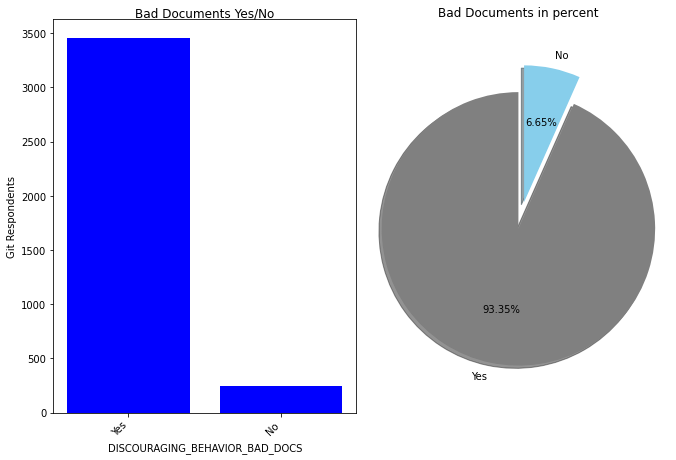

In [7]:
plt.rcParams["figure.figsize"] = [9.50, 6.50]
plt.rcParams["figure.autolayout"] = True
#print()
plt.subplot(1, 2, 1)
plt.bar(df_git.DISCOURAGING_BEHAVIOR_BAD_DOCS.dropna().unique(),df_git.DISCOURAGING_BEHAVIOR_BAD_DOCS.value_counts(ascending=False), color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('DISCOURAGING_BEHAVIOR_BAD_DOCS')
plt.ylabel('Git Respondents')
plt.title('Bad Documents Yes/No', pad=0)

b=len(df_git)
b1= df_git['DISCOURAGING_BEHAVIOR_BAD_DOCS'].value_counts().to_dict()

x7=b1.get('Yes')
x8=b1.get('No')
#print(b1)
print("Yes = ", x7, "No = ", x8, "Total = " , x7+x8)
labels= ['Yes', 'No']
colors=['gray', 'Skyblue']
sizes= [x7, x8]
# Draw second subplot using plt.subplot
plt.subplot(1, 2, 2)
plt.pie(sizes,labels=labels, colors=colors, startangle=90,shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.title('Bad Documents in percent', pad=0)


Yes =  1778 No =  1899 Total =  3677


Text(0.5, 1.0, 'Confliting Behaviour in percent')

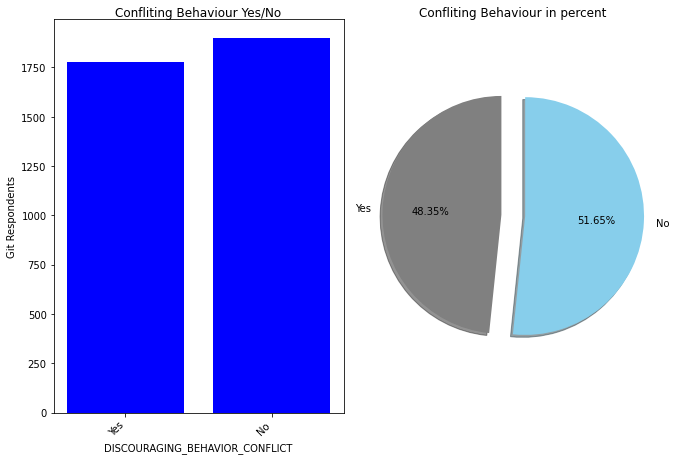

In [8]:
plt.rcParams["figure.figsize"] = [9.50, 6.50]
plt.rcParams["figure.autolayout"] = True
#print()
plt.subplot(1, 2, 1)
plt.bar(df_git.DISCOURAGING_BEHAVIOR_CONFLICT.dropna().unique(),df_git.DISCOURAGING_BEHAVIOR_CONFLICT.value_counts(ascending=True), color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('DISCOURAGING_BEHAVIOR_CONFLICT')
plt.ylabel('Git Respondents')
plt.title('Confliting Behaviour Yes/No', pad=0)

b=len(df_git)
b1= df_git['DISCOURAGING_BEHAVIOR_CONFLICT'].value_counts().to_dict()

x9=b1.get('Yes')
x10=b1.get('No')
#print(b1)
print("Yes = ", x9, "No = ", x10, "Total = ", x9+x10)
labels= ['Yes', 'No']
colors=['gray', 'Skyblue']
sizes= [x9, x10]
# Draw second subplot using plt.subplot
plt.subplot(1, 2, 2)
plt.pie(sizes,labels=labels, colors=colors, startangle=90,shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.title('Confliting Behaviour in percent', pad=0)


Yes =  625 No =  3063 Total =  3688


Text(0.5, 1.0, 'Unwelcoming Language in percent')

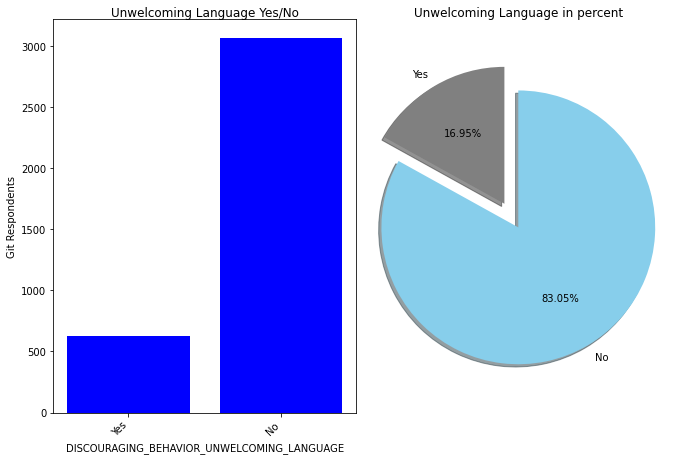

In [9]:
plt.rcParams["figure.figsize"] = [9.50, 6.50]
plt.rcParams["figure.autolayout"] = True

plt.subplot(1, 2, 1)
plt.bar(['Yes','No'],df_git.DISCOURAGING_BEHAVIOR_UNWELCOMING_LANGUAGE.value_counts(ascending=True), color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('DISCOURAGING_BEHAVIOR_UNWELCOMING_LANGUAGE')
plt.ylabel('Git Respondents')
plt.title('Unwelcoming Language Yes/No', pad=0)

b=len(df_git)
b1= df_git['DISCOURAGING_BEHAVIOR_UNWELCOMING_LANGUAGE'].value_counts().to_dict()

x11=b1.get('Yes')
x12=b1.get('No')
#print(b1)
print("Yes = ", x11, "No = ", x12, "Total = " , x11+x12)
labels= ['Yes', 'No']
colors=['gray', 'Skyblue']
sizes= [x11, x12]
# Draw second subplot using plt.subplot
plt.subplot(1, 2, 2)
plt.pie(sizes,labels=labels, colors=colors, startangle=90,shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.title('Unwelcoming Language in percent', pad=0)


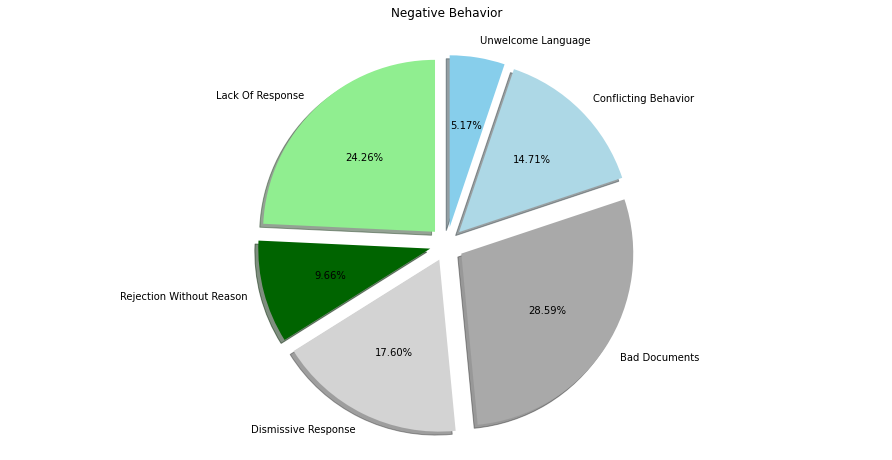

In [10]:
# Total % of various DISCOURAGING attributes exluding NA
plt.rcParams["figure.figsize"] = [12.50, 6.50]
plt.rcParams["figure.autolayout"] = True
labels= ['Lack Of Response', 'Rejection Without Reason', 'Dismissive Response','Bad Documents','Conflicting Behavior','Unwelcome Language']
colors=['lightgreen', 'darkgreen', 'lightgray','darkgray','lightblue','skyblue']
sizes= [x1, x3, x5,x7,x9,x11]
plt.pie(sizes,labels=labels, colors=colors, startangle=90,shadow=True,explode=(0.1, 0.1, 0.1,0.1,0.1,0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.title('Negative Behavior', pad=20)

plt.show()

In [11]:
# finding % of missing values per attribute in complete records

column_headers = list(df_git.columns.values)
b=len(df_git)
j=1
for x in column_headers:
    a= df_git[x].isna().sum()
    temp= round((a/b)*100,2)
    if temp >= 40:
        print(j," Missing Values in  ", x, " is ", temp , " %" )
        j=j+1
print("\n==================\n")

#Removing these high NA percentage attributes from dataset

df_git.drop(['OSS_AS_JOB', 'EMPLOYER_POLICY_DEPENDENCIES', 'OSS_HIRING','MINORITY_HOMECOUNTRY','OFF_SITE_ID'], axis=1, inplace=True)
column_headers = list(df_git.columns.values)
b=len(column_headers)
print("Number of attributes after droping above attributes =  ", b)

# removing 6 behaviour attributes
df_git.drop(['DISCOURAGING_BEHAVIOR_LACK_OF_RESPONSE', 'DISCOURAGING_BEHAVIOR_REJECTION_WOUT_EXPLANATION', 
             'DISCOURAGING_BEHAVIOR_DISMISSIVE_RESPONSE','DISCOURAGING_BEHAVIOR_BAD_DOCS',
             'DISCOURAGING_BEHAVIOR_CONFLICT','DISCOURAGING_BEHAVIOR_UNWELCOMING_LANGUAGE'], axis=1, inplace=True)

column_headers = list(df_git.columns.values)
b=len(column_headers)
print("Number of attributes after droping 6 Behaviour attributes =  ", b)

1  Missing Values in   OSS_AS_JOB  is  45.94  %
2  Missing Values in   EMPLOYER_POLICY_DEPENDENCIES  is  41.24  %
3  Missing Values in   OSS_HIRING  is  46.02  %
4  Missing Values in   MINORITY_HOMECOUNTRY  is  74.59  %
5  Missing Values in   OFF_SITE_ID  is  88.15  %


Number of attributes after droping above attributes =   89
Number of attributes after droping 6 Behaviour attributes =   83


In [12]:
import sys
!conda install --yes --prefix {sys.prefix} numpy
import numpy as np
import math
import matplotlib.ticker as ticker
!pip3 install openpyxl
import warnings
warnings.filterwarnings('ignore')
print('supressing warnings')





'conda' is not recognized as an internal or external command,
operable program or batch file.


You should consider upgrading via the 'C:\Users\Master\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


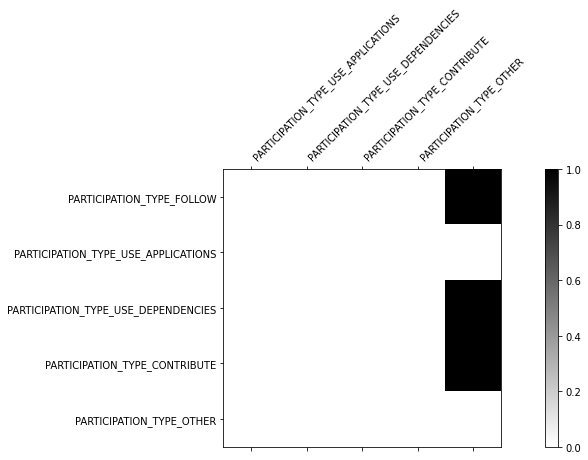

In [13]:
# Cross tabulation between  PARTICIPATION set

# importing the required function

from scipy.stats import chi2_contingency

# creating chi-sq values data between diffrent attributes of same sets
chi_sq = pd.DataFrame(columns=['1st attribute','2nd attribute','chi-sq','H0 result'])

j=3 # index to start the attribute list, list starts at 0
k=4 # number of attributes in given set
k1=k
k2=k+1

ticks = []
temp_list=[]
temp_list.clear()
mat = np.zeros(k2*k2).reshape(k2,k2)

for l in range (k1):
        
    ticks.append(df_git.columns[j])
    for i in range(k):
        #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
        
        temp_list.append(df_git.columns[j])
        temp_list.append(df_git.columns[i+j+1])
        
        Result=pd.crosstab(index=df_git[df_git.columns[j]],columns=df_git[df_git.columns[i+j+1]])
        
        #print(Result) 
        ChiSqResult = chi2_contingency(Result)
        
        #print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
        temp_list.append(ChiSqResult[1])
        
        if ChiSqResult[1] <= 0.05:
            #print("Categorical variables not correlated and H0 is rejected") 
            temp_list.append('rejected') 
        else:
            #print("Categorical variables correlated and H0 is accepted")
            #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
            temp_list.append('accepted')
        
        # adding list to ch_sq dataframe
        
        chi_sq = chi_sq.append(pd.DataFrame([temp_list], columns=['1st attribute','2nd attribute','chi-sq','H0 result']), ignore_index=True)
        
        # clearing temp list for next iteration
        temp_list.clear()
        
    k=k-1
    j=j+1

ticks.append(df_git.columns[j])

# calculating number of rows in dataframe
j1 = math.factorial(len(ticks))
j2= math.factorial(len(ticks)-2) 
j3= int(j1/(2*j2))

# creating matrix for plotting from the chi_sq dataframe

for u in range (j3):
    for v in range (2):
        i=1
        for w in ticks:
            j=1
            for x in ticks:
                if (chi_sq.loc[u][v] == w) and (chi_sq.loc[u][v+1] == x):
                    if (chi_sq.loc[u][v+3] == 'accepted'):
                        mat[i-1][j-1]=1
                j=j+1
            i=i+1        
print(mat)        
figure = plt.figure()
axes = figure.add_subplot(111)
caxes = axes.matshow(mat, cmap=plt.cm.gray_r)
figure.colorbar(caxes)
axes.set_xticklabels(ticks,rotation=45,ha='left')
axes.set_yticklabels(['']+ticks)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
axes.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

del mat
del temp_list
del ticks
del chi_sq
del figure

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


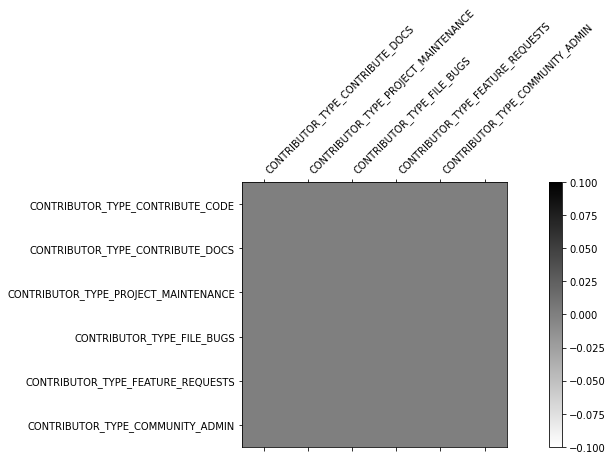

In [14]:
# Cross tabulation between  CONTRIBUTOR TYPE set

chi_sq = pd.DataFrame(columns=['1st attribute','2nd attribute','chi-sq','H0 result'])
j=8
k=5 # number of attributes in given set
k1=k
k2=k+1

ticks = []
temp_list=[]
temp_list.clear()
mat = np.zeros(k2*k2).reshape(k2,k2)

for l in range (k1):
        
    ticks.append(df_git.columns[j])
    for i in range(k):
        #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
        
        temp_list.append(df_git.columns[j])
        temp_list.append(df_git.columns[i+j+1])
        
        Result=pd.crosstab(index=df_git[df_git.columns[j]],columns=df_git[df_git.columns[i+j+1]])
        
        #print(Result) 
        ChiSqResult = chi2_contingency(Result)
        
        #print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
        temp_list.append(ChiSqResult[1])
        
        if ChiSqResult[1] <= 0.05:
            #print("Categorical variables not correlated and H0 is rejected") 
            temp_list.append('rejected') 
        else:
            #print("Categorical variables correlated and H0 is accepted")
            #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
            temp_list.append('accepted')
        
        # adding list to ch_sq dataframe
        
        chi_sq = chi_sq.append(pd.DataFrame([temp_list], columns=['1st attribute','2nd attribute','chi-sq','H0 result']), ignore_index=True)
        
        # clearing temp list for next iteration
        temp_list.clear()
        
    k=k-1
    j=j+1

ticks.append(df_git.columns[j])

# calculating number of rows in dataframe
j1 = math.factorial(len(ticks))
j2= math.factorial(len(ticks)-2) 
j3= int(j1/(2*j2))

# creating matrix for plotting from the chi_sq dataframe

for u in range (j3):
    for v in range (2):
        i=1
        for w in ticks:
            j=1
            for x in ticks:
                if (chi_sq.loc[u][v] == w) and (chi_sq.loc[u][v+1] == x):
                    if (chi_sq.loc[u][v+3] == 'accepted'):
                        mat[i-1][j-1]=1
                j=j+1
            i=i+1        
print(mat)        

figure = plt.figure()
axes = figure.add_subplot(111)
caxes = axes.matshow(mat, cmap=plt.cm.gray_r)
figure.colorbar(caxes)
axes.set_xticklabels(ticks,rotation=45,ha='left')
axes.set_yticklabels(['']+ticks)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
axes.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

del mat
del temp_list
del ticks
del chi_sq
del figure

[[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


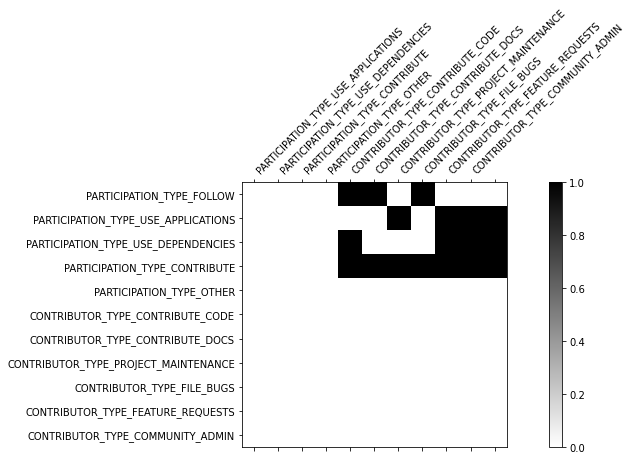

In [15]:
# Cross tabulation between  PARTICIPATION & CONTRIBUTER set
chi_sq = pd.DataFrame(columns=['1st attribute','2nd attribute','chi-sq','H0 result'])
j=3
k=10 # number of attributes in given set
k1=k
k2=k+1

ticks = []
temp_list=[]
temp_list.clear()
mat = np.zeros(k2*k2).reshape(k2,k2)

for l in range (k1):
        
    ticks.append(df_git.columns[j])
    for i in range(k):
        #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
        
        temp_list.append(df_git.columns[j])
        temp_list.append(df_git.columns[i+j+1])
        
        Result=pd.crosstab(index=df_git[df_git.columns[j]],columns=df_git[df_git.columns[i+j+1]])
        
        #print(Result) 
        ChiSqResult = chi2_contingency(Result)
        
        #print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
        temp_list.append(ChiSqResult[1])
        
        if ChiSqResult[1] <= 0.05:
            #print("Categorical variables not correlated and H0 is rejected") 
            temp_list.append('rejected') 
        else:
            #print("Categorical variables correlated and H0 is accepted")
            #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
            temp_list.append('accepted')
        
        # adding list to ch_sq dataframe
        
        chi_sq = chi_sq.append(pd.DataFrame([temp_list], columns=['1st attribute','2nd attribute','chi-sq','H0 result']), ignore_index=True)
        
        # clearing temp list for next iteration
        temp_list.clear()
        
    k=k-1
    j=j+1

ticks.append(df_git.columns[j])

# calculating number of rows in dataframe
j1 = math.factorial(len(ticks))
j2= math.factorial(len(ticks)-2) 
j3= int(j1/(2*j2))

# creating matrix for plotting from the chi_sq dataframe

for u in range (j3):
    for v in range (2):
        i=1
        for w in ticks:
            j=1
            for x in ticks:
                if (chi_sq.loc[u][v] == w) and (chi_sq.loc[u][v+1] == x):
                    if (chi_sq.loc[u][v+3] == 'accepted'):
                        mat[i-1][j-1]=1
                j=j+1
            i=i+1        
print(mat)        

figure = plt.figure()
axes = figure.add_subplot(111)
caxes = axes.matshow(mat, cmap=plt.cm.gray_r)
figure.colorbar(caxes)
axes.set_xticklabels(ticks,rotation=45,ha='left')
axes.set_yticklabels(['']+ticks)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
axes.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

del mat
del temp_list
del ticks
del chi_sq
del figure

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


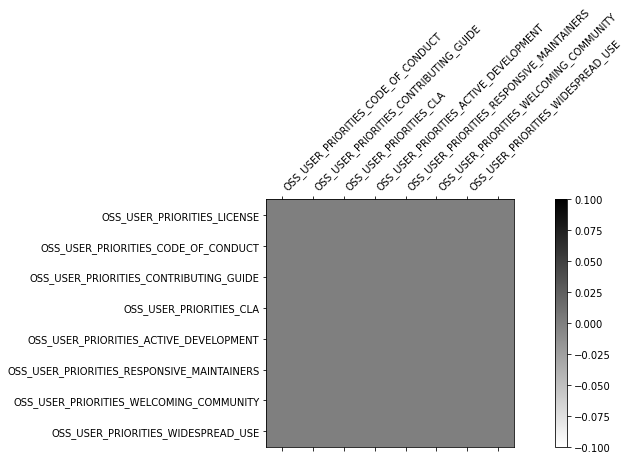

In [16]:
# Cross tabulation between  OSS USER PRIORITIES set

chi_sq = pd.DataFrame(columns=['1st attribute','2nd attribute','chi-sq','H0 result'])

j=18 # index for start of the dataset
k=7 # number of attributes in contribute set (count starts from 0)
k1=k
k2=k+1

ticks = []
temp_list=[]
temp_list.clear()
mat = np.zeros(k2*k2).reshape(k2,k2)

for l in range (k1):
        
    ticks.append(df_git.columns[j])
    for i in range(k):
        #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
        
        temp_list.append(df_git.columns[j])
        temp_list.append(df_git.columns[i+j+1])
        
        Result=pd.crosstab(index=df_git[df_git.columns[j]],columns=df_git[df_git.columns[i+j+1]])
        
        #print(Result) 
        ChiSqResult = chi2_contingency(Result)
        
        #print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
        temp_list.append(ChiSqResult[1])
        
        if ChiSqResult[1] <= 0.05:
            #print("Categorical variables not correlated and H0 is rejected") 
            temp_list.append('rejected') 
        else:
            #print("Categorical variables correlated and H0 is accepted")
            #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
            temp_list.append('accepted')
        
        # adding list to ch_sq dataframe
        
        chi_sq = chi_sq.append(pd.DataFrame([temp_list], columns=['1st attribute','2nd attribute','chi-sq','H0 result']), ignore_index=True)
        
        # clearing temp list for next iteration
        temp_list.clear()
        
    k=k-1
    j=j+1

ticks.append(df_git.columns[j])

# calculating number of rows in dataframe
j1 = math.factorial(len(ticks))
j2= math.factorial(len(ticks)-2) 
j3= int(j1/(2*j2))

# creating matrix for plotting from the chi_sq dataframe

for u in range (j3):
    for v in range (2):
        i=1
        for w in ticks:
            j=1
            for x in ticks:
                if (chi_sq.loc[u][v] == w) and (chi_sq.loc[u][v+1] == x):
                    if (chi_sq.loc[u][v+3] == 'accepted'):
                        mat[i-1][j-1]=1
                j=j+1
            i=i+1        
print(mat)        

figure = plt.figure()
axes = figure.add_subplot(111)
caxes = axes.matshow(mat, cmap=plt.cm.gray_r)
figure.colorbar(caxes)
axes.set_xticklabels(ticks,rotation=45,ha='left')
axes.set_yticklabels(['']+ticks)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
axes.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

del mat
del temp_list
del ticks
del chi_sq
del figure


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


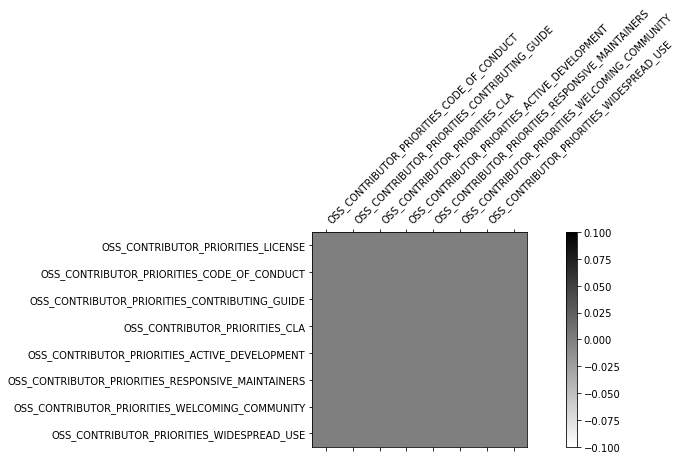

In [17]:
# Cross tabulation between  OSS CONTRIBUTERS PRIORITIES set
chi_sq = pd.DataFrame(columns=['1st attribute','2nd attribute','chi-sq','H0 result'])

j=26 # index for start of the dataset
k=7 # number of attributes in contribute set (count starts from 0)
k1=k
k2=k+1

ticks = []
temp_list=[]
temp_list.clear()
mat = np.zeros(k2*k2).reshape(k2,k2)

for l in range (k1):
        
    ticks.append(df_git.columns[j])
    for i in range(k):
        #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
        
        temp_list.append(df_git.columns[j])
        temp_list.append(df_git.columns[i+j+1])
        
        Result=pd.crosstab(index=df_git[df_git.columns[j]],columns=df_git[df_git.columns[i+j+1]])
        
        #print(Result) 
        ChiSqResult = chi2_contingency(Result)
        
        #print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
        temp_list.append(ChiSqResult[1])
        
        if ChiSqResult[1] <= 0.05:
            #print("Categorical variables not correlated and H0 is rejected") 
            temp_list.append('rejected') 
        else:
            #print("Categorical variables correlated and H0 is accepted")
            #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
            temp_list.append('accepted')
        
        # adding list to ch_sq dataframe
        
        chi_sq = chi_sq.append(pd.DataFrame([temp_list], columns=['1st attribute','2nd attribute','chi-sq','H0 result']), ignore_index=True)
        
        # clearing temp list for next iteration
        temp_list.clear()
        
    k=k-1
    j=j+1

ticks.append(df_git.columns[j])

# calculating number of rows in dataframe
j1 = math.factorial(len(ticks))
j2= math.factorial(len(ticks)-2) 
j3= int(j1/(2*j2))

# creating matrix for plotting from the chi_sq dataframe

for u in range (j3):
    for v in range (2):
        i=1
        for w in ticks:
            j=1
            for x in ticks:
                if (chi_sq.loc[u][v] == w) and (chi_sq.loc[u][v+1] == x):
                    if (chi_sq.loc[u][v+3] == 'accepted'):
                        mat[i-1][j-1]=1
                j=j+1
            i=i+1        
print(mat)        

figure = plt.figure()
axes = figure.add_subplot(111)
caxes = axes.matshow(mat, cmap=plt.cm.gray_r)
figure.colorbar(caxes)
axes.set_xticklabels(ticks,rotation=45,ha='left')
axes.set_yticklabels(['']+ticks)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
axes.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

del mat
del temp_list
del ticks
del chi_sq
del figure


[[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

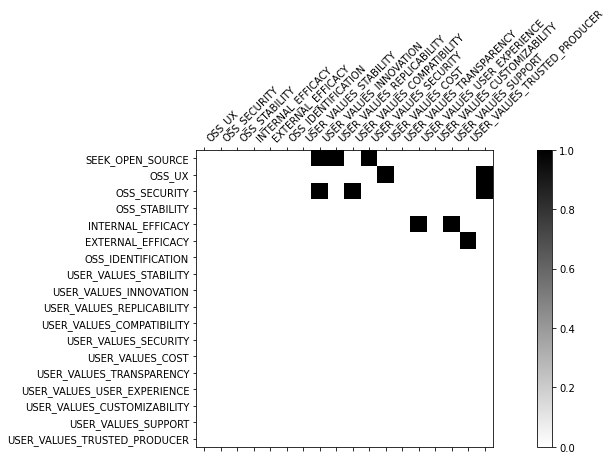

In [18]:
# Cross tabulation between  USER VALUES and MIS set
chi_sq = pd.DataFrame(columns=['1st attribute','2nd attribute','chi-sq','H0 result'])

j=34 # index for start of the dataset
k=17 # number of attributes in contribute set (count starts from 0)
k1=k
k2=k+1

ticks = []
temp_list=[]
temp_list.clear()
mat = np.zeros(k2*k2).reshape(k2,k2)

for l in range (k1):
        
    ticks.append(df_git.columns[j])
    for i in range(k):
        #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
        
        temp_list.append(df_git.columns[j])
        temp_list.append(df_git.columns[i+j+1])
        
        Result=pd.crosstab(index=df_git[df_git.columns[j]],columns=df_git[df_git.columns[i+j+1]])
        
        #print(Result) 
        ChiSqResult = chi2_contingency(Result)
        
        #print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
        temp_list.append(ChiSqResult[1])
        
        if ChiSqResult[1] <= 0.05:
            #print("Categorical variables not correlated and H0 is rejected") 
            temp_list.append('rejected') 
        else:
            #print("Categorical variables correlated and H0 is accepted")
            #print("1st = ", df_git.columns[j], " 2nd = ", df_git.columns[i+j+1])
            temp_list.append('accepted')
        
        # adding list to ch_sq dataframe
        
        chi_sq = chi_sq.append(pd.DataFrame([temp_list], columns=['1st attribute','2nd attribute','chi-sq','H0 result']), ignore_index=True)
        
        # clearing temp list for next iteration
        temp_list.clear()
        
    k=k-1
    j=j+1

ticks.append(df_git.columns[j])

# calculating number of rows in dataframe
j1 = math.factorial(len(ticks))
j2= math.factorial(len(ticks)-2) 
j3= int(j1/(2*j2))

# creating matrix for plotting from the chi_sq dataframe

for u in range (j3):
    for v in range (2):
        i=1
        for w in ticks:
            j=1
            for x in ticks:
                if (chi_sq.loc[u][v] == w) and (chi_sq.loc[u][v+1] == x):
                    if (chi_sq.loc[u][v+3] == 'accepted'):
                        mat[i-1][j-1]=1
                j=j+1
            i=i+1        
print(mat)        

figure = plt.figure()
axes = figure.add_subplot(111)
caxes = axes.matshow(mat, cmap=plt.cm.gray_r)
figure.colorbar(caxes)
axes.set_xticklabels(ticks,rotation=45,ha='left')
axes.set_yticklabels(['']+ticks)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
axes.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()
del mat
del temp_list
del ticks
del chi_sq
del figure

In [19]:
# deleting some not useful attributes
str='Attributes like status- as all completed records are used, translate, date submitted have no relation\nto the desired behaviour attribute as all values are same'  
print(str)
# deleting above stated attributes
df_git.drop(['DATE_SUBMITTED', 'STATUS','TRANSLATED'], axis=1, inplace=True)

column_headers = list(df_git.columns.values)
b=len(column_headers)
print("Number of attributes after droping 6 Behaviour attributes =  ", b)

Attributes like status- as all completed records are used, translate, date submitted have no relation
to the desired behaviour attribute as all values are same
Number of attributes after droping 6 Behaviour attributes =   80


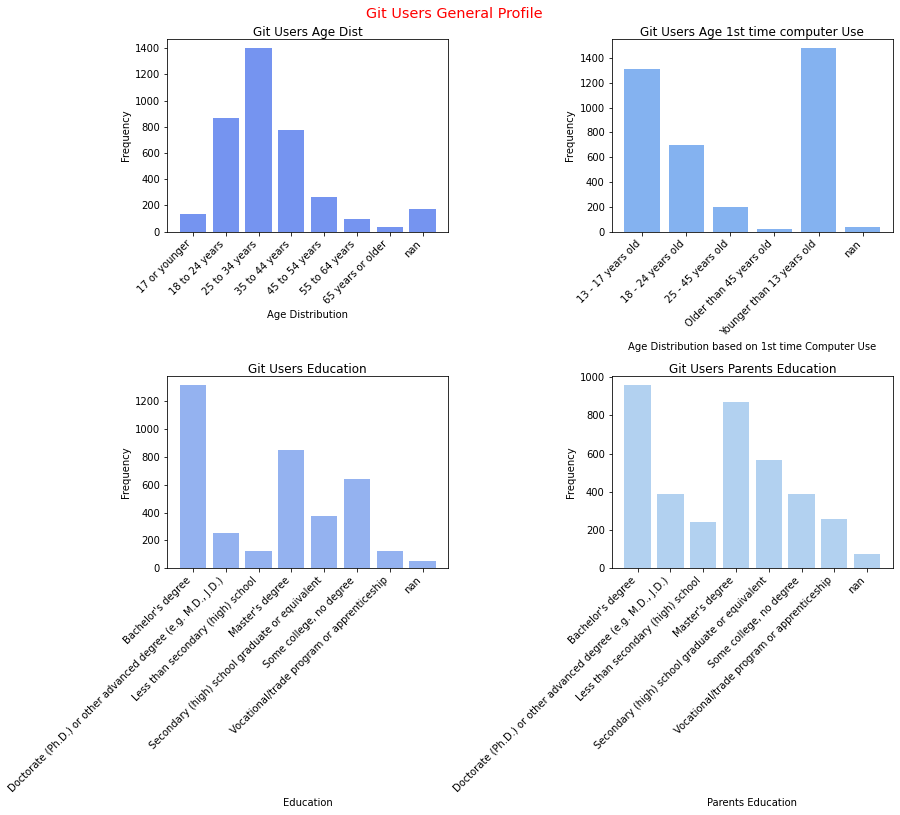

In [20]:
# some bar chart for few of the attributes to show the frequency of options 
plt.rcParams["figure.figsize"] = [12.50, 11.50]
plt.rcParams["figure.autolayout"] = True
plt.suptitle("Git Users General Profile", fontsize="x-large", color='red')
count = df_git['AGE'].value_counts(dropna=False).sort_index(ascending=True)

x = df_git['AGE'].unique()
x=x.astype('str')
x=sorted(x)


#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(2,2,1)
#This will create the bar graph for poulation

plt.bar(x,count, color=(0.1, 0.3, 0.9, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')
plt.title('Git Users Age Dist', pad=0)

#The below code will create the second plot.
plt.subplot(2,2,2)

count = df_git['AGE_AT_FIRST_COMPUTER_INTERNET'].value_counts(dropna=False).sort_index(ascending=True)
#print(count)
x = df_git['AGE_AT_FIRST_COMPUTER_INTERNET'].unique()
x=x.astype('str')
x=sorted(x)
plt.bar(x,count, color=(0.2, 0.5, 0.9, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age Distribution based on 1st time Computer Use')
plt.ylabel('Frequency')
plt.title('Git Users Age 1st time computer Use', pad=0)



#The below code will create the 3rd plot.
plt.subplot(2,2,3)

count = df_git['FORMAL_EDUCATION'].value_counts(dropna=False).sort_index(ascending=True)
#print(count)
x = df_git['FORMAL_EDUCATION'].unique()
x=x.astype('str')
x=sorted(x)
plt.bar(x,count, color=(0.3, 0.5, 0.9, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Git Users Education', pad=0)

#The below code will create the 4th plot.
plt.subplot(2,2,4)

count = df_git['PARENTS_FORMAL_EDUCATION'].value_counts(dropna=False).sort_index(ascending=True)
#print(count)
x = df_git['PARENTS_FORMAL_EDUCATION'].unique()
x=x.astype('str')
x=sorted(x)
plt.bar(x,count, color=(0.5, 0.7, 0.9, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Parents Education')
plt.ylabel('Frequency')
plt.title('Git Users Parents Education', pad=0)



plt.show()

Text(0.5, 1.0, 'Git Users IMMIGRATION Choice')

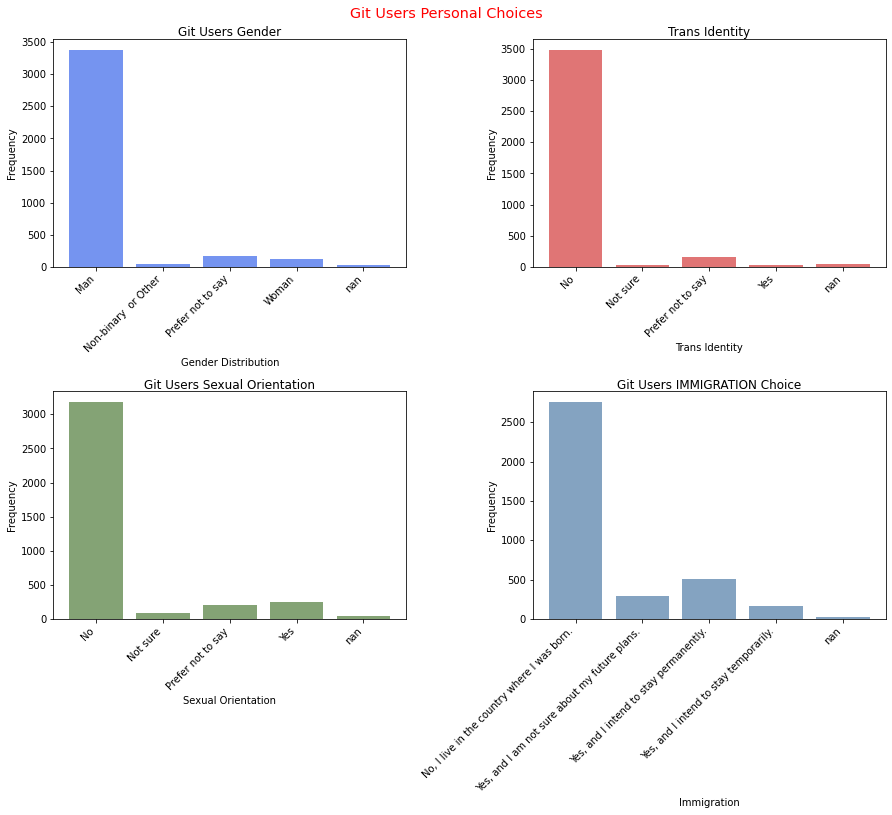

In [21]:
# some bar chart for few of the attributes to show the frequency of options 
plt.rcParams["figure.figsize"] = [12.50, 11.50]
plt.rcParams["figure.autolayout"] = True

plt.suptitle("Git Users Personal Choices", fontsize="x-large", color='red')

count = df_git['GENDER'].value_counts(dropna=False).sort_index(ascending=True)
x = df_git['GENDER'].unique()
x=x.astype('str')
x=sorted(x)


#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(2,2,1)
#This will create the bar graph for poulation

plt.bar(x,count, color=(0.1, 0.3, 0.9, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Gender Distribution')
plt.ylabel('Frequency')
plt.title('Git Users Gender', pad=0)

#The below code will create the second plot.
plt.subplot(2,2,2)

count = df_git['TRANSGENDER_IDENTITY'].value_counts(dropna=False).sort_index(ascending=True)
#print(count)
x = df_git['TRANSGENDER_IDENTITY'].unique()
x=x.astype('str')
x=sorted(x)
plt.bar(x,count , color=(0.8, 0.1, 0.1, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Trans Identity')
plt.ylabel('Frequency')
plt.title('Trans Identity', pad=0)


#The below code will create the 3rd plot.
plt.subplot(2,2,3)

count = df_git['SEXUAL_ORIENTATION'].value_counts(dropna=False).sort_index(ascending=True)
#print(count)
x = df_git['SEXUAL_ORIENTATION'].unique()
x=x.astype('str')
x=sorted(x)
plt.bar(x,count, color=(0.2, 0.4, 0.1, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sexual Orientation')
plt.ylabel('Frequency')
plt.title('Git Users Sexual Orientation', pad=0)

#The below code will create the 4th plot.
plt.subplot(2,2,4)

count = df_git['IMMIGRATION'].value_counts(dropna=False).sort_index(ascending=True)
#print(count)
x = df_git['IMMIGRATION'].unique()
x=x.astype('str')
x=sorted(x)
plt.bar(x,count,color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Immigration')
plt.ylabel('Frequency')
plt.title('Git Users IMMIGRATION Choice', pad=0)

Text(0.5, 1.0, 'Transparency')

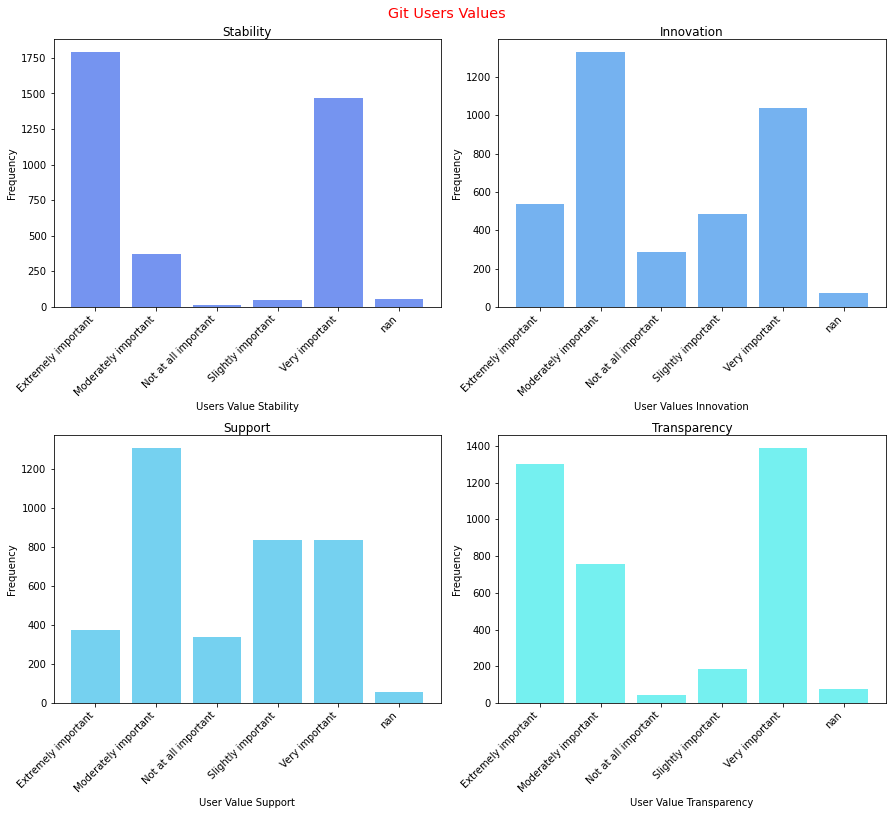

In [22]:
# some bar chart for few of the attributes to show the frequency of options 
plt.rcParams["figure.figsize"] = [12.50, 11.50]
plt.rcParams["figure.autolayout"] = True

plt.suptitle("Git Users Values", fontsize="x-large", color='red')

count = df_git['USER_VALUES_STABILITY'].value_counts(dropna=False).sort_index(ascending=True)
x = df_git['USER_VALUES_STABILITY'].unique()
x=x.astype('str')
x=sorted(x)


#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(2,2,1)
#This will create the bar graph for poulation

plt.bar(x,count, color=(0.1, 0.3, 0.9, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Users Value Stability')
plt.ylabel('Frequency')
plt.title('Stability', pad=0)

#The below code will create the second plot.
plt.subplot(2,2,2)

count = df_git['USER_VALUES_INNOVATION'].value_counts(dropna=False).sort_index(ascending=True)
#print(count)
x = df_git['USER_VALUES_INNOVATION'].unique()
x=x.astype('str')
x=sorted(x)
plt.bar(x,count , color=(0.1, 0.5, 0.9, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('User Values Innovation')
plt.ylabel('Frequency')
plt.title('Innovation', pad=0)


#The below code will create the 3rd plot.
plt.subplot(2,2,3)

count = df_git['USER_VALUES_SUPPORT'].value_counts(dropna=False).sort_index(ascending=True)
#print(count)
x = df_git['USER_VALUES_SUPPORT'].unique()
x=x.astype('str')
x=sorted(x)
plt.bar(x,count, color=(0.1, 0.7, 0.9, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('User Value Support')
plt.ylabel('Frequency')
plt.title('Support', pad=0)

#The below code will create the 4th plot.
plt.subplot(2,2,4)

count = df_git['USER_VALUES_TRANSPARENCY'].value_counts(dropna=False).sort_index(ascending=True)
#print(count)
x = df_git['USER_VALUES_TRANSPARENCY'].unique()
x=x.astype('str')
x=sorted(x)
plt.bar(x,count,color=(0.1, 0.9, 0.9, 0.6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('User Value Transparency')
plt.ylabel('Frequency')
plt.title('Transparency', pad=0)

In [23]:

decision_df = df_git.copy(deep=True)
x1 = list(decision_df.columns.values)
# converting following attributes to Ranks as all values are ordinal categoris
print('Following attributes have same ordinal data i.e. Nan, Never, Rarely, Occationaly & Freqently')
#print(x1[6:12])
print('replacing this ordinal data to RANK as Nan, Never=0, Rarely=1, Occationaly=2 & Freqently=3')

step=6

Ranking = {"Never":0, "Rarely":1, "Occasionally":2 , "Frequently":3}

for i in range (6):
    print('\n')
    print('ATTRIBUTE = ', x1[i+step])
    print('\n')
    count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    
    Ranking_df = pd.DataFrame(index=[],columns=['Original Options       |  ','    Rank  |  ','Count  |'])
    
    q = decision_df[x1[i+step]].unique()
    q=q.astype('str')
    q=sorted(q)
    
    for j in range (len(q)):
        Ranking_df.at[j,'Original Options       |  ']= q[j]
    
    # Replacing with Ranks
    decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    
    # Again counting unique attribute values based on Ranks
    
    count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count_1)
    #print('------')
    #print(count_1.index[len(q)-1])
    c_2=list(count_1)
    
    for j in range (len(q)):
        if(Ranking_df._get_value(j, 'Original Options       |  ') == q[j]):
            Ranking_df.at[j,'    Rank  |  ']= Ranking.get(q[j])
    
    for j in range (len(q)):
        for k in range (len(q)-1):
            if(Ranking_df._get_value(j, '    Rank  |  ') == k):
                Ranking_df.at[j,'Count  |']= count_1[k]
    Ranking_df.at[len(q)-1,'Count  |']= c_2[len(q)-1]   
    
    
    print(Ranking_df)
    del Ranking_df

Following attributes have same ordinal data i.e. Nan, Never, Rarely, Occationaly & Freqently
replacing this ordinal data to RANK as Nan, Never=0, Rarely=1, Occationaly=2 & Freqently=3


ATTRIBUTE =  CONTRIBUTOR_TYPE_CONTRIBUTE_CODE


  Original Options       |       Rank  |   Count  |
0                 Frequently             3      847
1                      Never             0      138
2               Occasionally             2      902
3                     Rarely             1      877
4                        nan          None      982


ATTRIBUTE =  CONTRIBUTOR_TYPE_CONTRIBUTE_DOCS


  Original Options       |       Rank  |   Count  |
0                 Frequently             3      349
1                      Never             0      422
2               Occasionally             2      857
3                     Rarely             1     1123
4                        nan          None      995


ATTRIBUTE =  CONTRIBUTOR_TYPE_PROJECT_MAINTENANCE


  Original Options       |       Rank 

In [24]:
# converting Employment attributes to Encoding as all values are nominal categoris
print('Following attributes are the nominal data i.e. Temporarily not working, Retired or permanently not working , Full time student,  Employed part time, Employed full time & Nan')

print('replacing this nominal data to Dummy Encoding')

#encode the data


from sklearn.preprocessing import LabelEncoder

#emp column added with encoded values
    # https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db

    
print('ATTRIBUTE = ',  x1[i+1+step])
print('\n')
e = decision_df[x1[i+1+step]].value_counts(dropna=False).sort_index(ascending=False)
print(e)   
    
decision_df['emp'] = LabelEncoder().fit_transform(decision_df['EMPLOYMENT_STATUS'])

#deleting EMPLOYMENT_STATUS column

decision_df.drop(['EMPLOYMENT_STATUS'], axis=1, inplace=True)
#xx1 = list(decision_df.columns.values)
#print(xx1)

#renaming emp back to EMPLOYMENT_STATUS

decision_df.rename(columns = {'emp':'EMPLOYMENT_STATUS'}, inplace = True)

#xx1 = list(decision_df.columns.values)
#print('============')
#print(xx1)

# shift column 'EMPLOYMENT_STATUS' to its original pos
emp_column = decision_df.pop('EMPLOYMENT_STATUS')
decision_df.insert(12, 'EMPLOYMENT_STATUS', emp_column)
xx1 = list(decision_df.columns.values)
#print('============')
#print(xx1)

print('ATTRIBUTE = ',  x1[i+1+step])
print('\n')
e = decision_df[x1[i+1+step]].value_counts(dropna=False).sort_index(ascending=False)
print(e) 

Following attributes are the nominal data i.e. Temporarily not working, Retired or permanently not working , Full time student,  Employed part time, Employed full time & Nan
replacing this nominal data to Dummy Encoding
ATTRIBUTE =  EMPLOYMENT_STATUS


Temporarily not working                                         219
Retired or permanently not working (e.g. due to disability)      69
Other - please describe                                         134
Full time student                                               673
Employed part time                                              226
Employed full time                                             2416
NaN                                                               9
Name: EMPLOYMENT_STATUS, dtype: int64
ATTRIBUTE =  EMPLOYMENT_STATUS


6       9
5     219
4      69
3     134
2     673
1     226
0    2416
Name: EMPLOYMENT_STATUS, dtype: int64


In [25]:
# converting following attribute to Ranks as all values are ordinal categoris
#print('Following attributes have ordinal data i.e. Nan, Never, Rarely, Occationaly & Freqently')
#print(x1[13:16])
#print('replacing this ordinal data to RANK as Nan, Never=0, Rarely=1, Occationaly=2 & Freqently=3')
x1= list(decision_df.columns.values)
step=13
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"Never":0, "Rarely":1, "Occasionally":2 , "Frequently":3}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)

step=14
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"Not at all interested":0, "Not too interested":1, "Somewhat interested":2 , "Very interested":3}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)

step=15
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"Very unlikely":0, "Somewhat unlikely":1, "Somewhat likely":2 , "Very likely":3}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)

#print('Following attributes have same ordinal data i.e. Nan, Never, Rarely, Occationaly & Freqently')
#print(x1[6:12])
#print('replacing this ordinal data to RANK as Nan, Never=0, Rarely=1, Occationaly=2 & Freqently=3')

step=16

Ranking = {"Very important to have":3, "Very important not to have":3, "Somewhat important to have":2 , "Somewhat important not to have":2 , "Not important either way":1 , "Don't know what this is":0}


for i in range (16):
    #print('\n')
    #print('ATTRIBUTE = ', x1[i+step])
    #print('\n')
    count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count)
   
    # Replacing with Ranks
    decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    
    # Again counting unique attribute values based on Ranks
    
    count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count_1)
    #print('------')


step=32
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"Always":3, "Sometimes":2, "Rarely":1 , "Never":0}
# Replacing with Ranks
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
# Again counting unique attribute values based on Ranks
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count_1)

print('many attributes are ranked')


many attributes are ranked


In [26]:
step=33
i=0
Ranking = {"Generally harder to use":2, "About the same":1, "Generally easier to use":0}

print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
del count
   
# Replacing with Ranks
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    
# Again counting unique attribute values based on Ranks    
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)
del count_1


step=34
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)

print(count)
Ranking = {"Generally more secure":2,"About the same":1,"Generally less secure":0}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)


step=35
i=0
Ranking = {"Generally more stable":2, "About the same":1, "Generally less stable":0}

print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

   
# Replacing with Ranks
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    
# Again counting unique attribute values based on Ranks    
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)





ATTRIBUTE =  OSS_UX


Generally harder to use     733
Generally easier to use    1288
About the same             1704
NaN                          21
Name: OSS_UX, dtype: int64
2.0     733
1.0    1704
0.0    1288
NaN      21
Name: OSS_UX, dtype: int64


ATTRIBUTE =  OSS_SECURITY


Generally more secure    2273
Generally less secure     203
About the same           1253
NaN                        17
Name: OSS_SECURITY, dtype: int64
2.0    2273
1.0    1253
0.0     203
NaN      17
Name: OSS_SECURITY, dtype: int64


ATTRIBUTE =  OSS_STABILITY


Generally more stable    1166
Generally less stable     693
About the same           1862
NaN                        25
Name: OSS_STABILITY, dtype: int64
2.0    1166
1.0    1862
0.0     693
NaN      25
Name: OSS_STABILITY, dtype: int64


In [27]:
Ranking = {"Strongly disagree":0, "Somewhat disagree":1, "Neither agree nor disagree":2 , "Somewhat agree":3 , "Strongly agree":4}
step= 36
for i in range (3):
    #print('\n')
    #print('ATTRIBUTE = ', x1[i+step])
    #print('\n')
    count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count)
    #Replacing with Ranks
    decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    
    # Again counting unique attribute values based on Ranks
    
    count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count_1)
    #print('******')


step=39
Ranking = {"Not at all important":0, "Slightly important":1, "Moderately important":2 , "Very important":3 , "Extremely important":4}
for i in range (11):
    #print('\n')
    #print('ATTRIBUTE = ', x1[i+step])
    #print('\n')
    count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count)
    #Replacing with Ranks
    decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
    count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    #print(count_1)
    #print('******')

step = 50
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"Records of authorship should be required so that end users know who created the source code they are working with.":1, "People should be able to contribute code without attribution, if they wish to remain anonymous.":0}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count_1)

step = 51
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"No information at all about me":0, "A little information about me":1, "Some information about me":2 , "A lot of information about me":3 }
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count_1)

step = 52
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"No":0, "Yes":1 }
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count_1)


step = 53
i=0
#print('\n')
#print('ATTRIBUTE = ', x1[i+step])
#print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count)
Ranking = {"I don't publish this kind of content online.":0, "I take precautions to use different pseudonymns on different platforms.":1 , "I usually use a consistent pseudonym that is not linked anywhere with my real name online.":2 , "I usually use a consistent pseudonym that is easily linked to my real name online.":3 , "I include my real name.":4 }
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
#print(count_1)
print('ranking or encoding done till attribute 53')

ranking or encoding done till attribute 53


In [28]:
step = 54
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
#count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
count = decision_df[x1[i+step]].unique()
print(count)
Ranking = {"I include my real name.":3,"I usually contribute using a consistent pseudonym that is not linked anywhere with my real name online. ":1 , "I usually contribute using a consistent pseudonym that is easily linked to my real name online.":2 , "I take precautions to use different usernames  in different projects.":0  }

decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 55
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"No":0, "Yes":1 }
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

# now this is a categorical attribute and not a ordinal attribute
# hence 
step = 56
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df['helper'] = LabelEncoder().fit_transform(decision_df[x1[i+step]])

#deleting FIND_HELPER column

decision_df.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to FIND_HELPER

decision_df.rename(columns = {'helper':'FIND_HELPER'}, inplace = True)

# shift column 'FIND_HELPER' to its original pos
help_column = decision_df.pop('FIND_HELPER')
decision_df.insert(56, 'FIND_HELPER', help_column)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 57
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Total strangers, I didn't know of them previously.":0, "I knew of them through their contributions to projects, but didn't know them personally.":1, "We knew each other a little.":2 ,"We knew each other well.":3}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)
print('ranking or encoding done till attribute 57')



ATTRIBUTE =  TRANSPARENCY_PRIVACY_PRACTICES_OSS


['I include my real name.' nan
 'I usually contribute using a consistent pseudonym that is easily linked to my real name online.'
 'I usually contribute using a consistent pseudonym that is not linked anywhere with my real name online. '
 'I take precautions to use different usernames  in different projects.']
3.0    1744
2.0     732
1.0     248
0.0      36
NaN     986
Name: TRANSPARENCY_PRIVACY_PRACTICES_OSS, dtype: int64


ATTRIBUTE =  RECEIVED_HELP


Yes    2746
No      974
NaN      26
Name: RECEIVED_HELP, dtype: int64
1.0    2746
0.0     974
NaN      26
Name: RECEIVED_HELP, dtype: int64


ATTRIBUTE =  FIND_HELPER


Someone offered me unsolicited help.                                                                               267
Other - Please describe                                                                                             62
I asked for help in a public forum (e.g. in a GitHub Issue, project mailing list, e

In [29]:
step = 58
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
#
decision_df['xx'] = LabelEncoder().fit_transform(decision_df[x1[i+step]])
#deleting RECEIVED_HELP_TYPE column

decision_df.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to FIND_HELPER

decision_df.rename(columns = {'xx':'RECEIVED_HELP_TYPE'}, inplace = True)

# shift column 'RECEIVED_HELP_TYPE' to its original pos
help_column = decision_df.pop('RECEIVED_HELP_TYPE')
decision_df.insert(58, 'RECEIVED_HELP_TYPE', help_column)
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 59
i=0
# a Simple attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

Ranking = {"No":0, "Yes":1 }
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)


step = 60
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df['xx'] = LabelEncoder().fit_transform(decision_df[x1[i+step]])

#deleting FIND_HELPEE column

decision_df.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to FIND_HELPER

decision_df.rename(columns = {'xx':'FIND_HELPEE'}, inplace = True)

# shift column 'FIND_HELPEE' to its original pos
help_column = decision_df.pop('FIND_HELPEE')
decision_df.insert(60, 'FIND_HELPEE', help_column)
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)


step = 61
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

Ranking = {"We knew each other well.":3, "We knew each other  a little.":2 , "Total strangers, I didn't know of them previously.":0, "I knew of them through their contributions to projects, but didn't know them personally.":0}
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)


step = 62
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df['xx'] = LabelEncoder().fit_transform(decision_df[x1[i+step]])

#deleting PROVIDED_HELP_TYPE column

decision_df.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to PROVIDED_HELP_TYPE

decision_df.rename(columns = {'xx':'PROVIDED_HELP_TYPE'}, inplace = True)

# shift column 'PROVIDED_HELP_TYPE' to its original pos
help_column = decision_df.pop('PROVIDED_HELP_TYPE')
decision_df.insert(62, 'PROVIDED_HELP_TYPE', help_column)
decision_df[x1[i+step]] = decision_df[x1[i+step]].replace(Ranking)
count_1 = decision_df[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)



ATTRIBUTE =  RECEIVED_HELP_TYPE


Writing code or otherwise implementing ideas.                                                         1575
Understanding community norms (e.g. how to submit a contribution, how to communicate effectively).     176
Other (please describe)                                                                                138
Introductions to other people                                                                           13
Installing or using an application.                                                                    794
NaN                                                                                                   1050
Name: RECEIVED_HELP_TYPE, dtype: int64
5    1050
4    1575
3     176
2     138
1      13
0     794
Name: RECEIVED_HELP_TYPE, dtype: int64


ATTRIBUTE =  PROVIDED_HELP


Yes    2789
No      940
NaN      17
Name: PROVIDED_HELP, dtype: int64
1.0    2789
0.0     940
NaN      17
Name: PROVIDED_HELP, dtype: int64


ATTRIBUTE =

In [30]:
# # MAKING COPY OF WORKING DATAFRAME

decision_df2 = decision_df.copy(deep=True)

print('last remaining attributes ranking and encoding')
step = 63
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Frequently":3, "Sometimes":2 , "Rarely":1, "Never":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 64
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"I am free to contribute without asking for permission.":3, "I am permitted to contribute to open source, but need to ask for permission.":2 , "Not applicable":1, "I'm not sure.":1, "My employer doesn't have a clear policy on this.":1, "I am not permitted to contribute to open source at all.":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 65
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Use of open source applications is encouraged.":2,"Use of open source applications is acceptable if it is the most appropriate tool.":2, "Use of open source applications is rarely, if ever, permitted.":1 , "Not applicable":0, "My employer doesn't have a clear policy on this.":0, "I'm not sure.":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 66
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df2['xx'] = LabelEncoder().fit_transform(decision_df2[x1[i+step]])

#deleting IMMIGRATION column

decision_df2.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to IMMIGRATION

decision_df2.rename(columns = {'xx':'IMMIGRATION'}, inplace = True)

# shift column 'IMMIGRATION' to its original pos
help_column = decision_df2.pop('IMMIGRATION')
decision_df2.insert(66, 'IMMIGRATION', help_column)
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)


step = 67
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Yes":2,"Prefer not to say":1, "Not sure":1 ,"No":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 68
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Man":2,"Woman":1, "Non-binary  or Other":0 ,"Prefer not to say":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 69
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df2['xx'] = LabelEncoder().fit_transform(decision_df2[x1[i+step]])

#deleting TRANSGENDER_IDENTITY column

decision_df2.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to TRANSGENDER_IDENTITY

decision_df2.rename(columns = {'xx':'TRANSGENDER_IDENTITY'}, inplace = True)

# shift column 'TRANSGENDER_IDENTITY' to its original pos
help_column = decision_df2.pop('TRANSGENDER_IDENTITY')
decision_df2.insert(69, 'TRANSGENDER_IDENTITY', help_column)
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 70
i=0
# a categorical attribute
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
decision_df2['xx'] = LabelEncoder().fit_transform(decision_df2[x1[i+step]])
#deleting SEXUAL_ORIENTATION column

decision_df2.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to SEXUAL_ORIENTATION

decision_df2.rename(columns = {'xx':'SEXUAL_ORIENTATION'}, inplace = True)

# shift column 'SEXUAL_ORIENTATION' to its original pos
help_column = decision_df2.pop('SEXUAL_ORIENTATION')
decision_df2.insert(70, 'SEXUAL_ORIENTATION', help_column)
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 71
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Not at all":0,"Not very well":1, "Moderately well":2 ,"Very well":3}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 72
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"17 or younger":0,"18 to 24 years":1, "25 to 34 years":2 ,"35 to 44 years":3 ,"45 to 54 years":4,"55 to 64 years":5 ,"65 years or older":6}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 73
for i in range (2):
    print('\n')
    print('ATTRIBUTE = ', x1[i+step])
    print('\n')
    count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    print(count)
    Ranking = {"Less than secondary (high) school":0,"Secondary (high) school graduate or equivalent":1, "Some college, no degree":2 ,"Vocational/trade program or apprenticeship":3 ,"Bachelor's degree":4,"Master's degree":5 ,"Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)":6}
    decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
    count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
    print(count_1)

step = 75
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"Younger than 13 years old":0,"13 - 17 years old":1,"18 - 24 years old":1, "25 - 45 years old":1 ,"Older than 45 years old":2}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

# attribute LOCATION_OF_FIRST_COMPUTER_INTERNET is categorical attribute
step = 76
i=0
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)

decision_df2['xx'] = LabelEncoder().fit_transform(decision_df2[x1[i+step]])

#deleting LOCATION_OF_FIRST_COMPUTER_INTERNET column

decision_df2.drop([x1[i+step]], axis=1, inplace=True)

#renaming helper back to LOCATION_OF_FIRST_COMPUTER_INTERNET

decision_df2.rename(columns = {'xx':'LOCATION_OF_FIRST_COMPUTER_INTERNET'}, inplace = True)

# shift column 'IMMIGRATION' to its original pos
help_column = decision_df2.pop('LOCATION_OF_FIRST_COMPUTER_INTERNET')
decision_df2.insert(76, 'LOCATION_OF_FIRST_COMPUTER_INTERNET', help_column)
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

step = 77
i=0
#attribute PARTICIPATION_TYPE_ANY_REPONSE has mainly same value of 1 hence drop
x1 = list(decision_df.columns.values)
print('header len' , len(x1))
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
if(x1[i+step] == 'PARTICIPATION_TYPE_ANY_REPONSE'):
    decision_df2.drop([x1[i+step]], axis=1, inplace=True)
x1 = list(decision_df2.columns.values)
print('\n')
print('ATTRIBUTE = ', x1[i+step])
print('\n')
print('header len' , len(x1))



count = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count)
Ranking = {"github":1,"off site community":0}
decision_df2[x1[i+step]] = decision_df2[x1[i+step]].replace(Ranking)
count_1 = decision_df2[x1[i+step]].value_counts(dropna=False).sort_index(ascending=False)
print(count_1)

last remaining attributes ranking and encoding


ATTRIBUTE =  OSS_AT_WORK


Sometimes      290
Rarely         109
Never           65
Frequently    2167
NaN           1115
Name: OSS_AT_WORK, dtype: int64
3.0    2167
2.0     290
1.0     109
0.0      65
NaN    1115
Name: OSS_AT_WORK, dtype: int64


ATTRIBUTE =  OSS_IP_POLICY


Not applicable                                                                   178
My employer doesn't have a clear policy on this.                                 690
I'm not sure.                                                                    234
I am permitted to contribute to open source, but need to ask for permission.     285
I am not permitted to contribute to open source at all.                           63
I am free to contribute without asking for permission.                          1172
NaN                                                                             1124
Name: OSS_IP_POLICY, dtype: int64
3.0    1172
2.0     285
1.0    1102
0.0      

In [31]:
# ################################################################################
# ################ saving all ranked and encoded columns to new cvs file #########
# ################################################################################


decision_df2.to_csv('C:/Users/Master/Desktop/CIND 820/r2_1.csv', encoding='utf-8', index=False)
print('all attributes are either RANKED or ENCODED')

all attributes are either RANKED or ENCODED


In [32]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.impute import MissingIndicator

In [33]:

# making copy of the dataframe to work
decision_df3 = decision_df2.copy(deep=True)

# filling all Nan values with -1
decision_df3=decision_df3.fillna(-1)
decision_df3.to_csv('C:/Users/Master/Desktop/CIND 820/r2_2.csv', encoding='utf-8', index=False)
print('all attributes are either RANKED or ENCODED')
print('\n')
#print('Number of attributes',len(list(decision_df3.columns.values)))
x2=len(list(decision_df3.columns.values))
x3 = x1[1:x2-1]
print('Number of attributes used in classification = ', len(x3))
print('\n')
print('ATTRIBUTES TO BE USED ON TARGET VARIABLE')
print(x3)

all attributes are either RANKED or ENCODED


Number of attributes used in classification =  77


ATTRIBUTES TO BE USED ON TARGET VARIABLE
['PARTICIPATION_TYPE_FOLLOW', 'PARTICIPATION_TYPE_USE_APPLICATIONS', 'PARTICIPATION_TYPE_USE_DEPENDENCIES', 'PARTICIPATION_TYPE_CONTRIBUTE', 'PARTICIPATION_TYPE_OTHER', 'CONTRIBUTOR_TYPE_CONTRIBUTE_CODE', 'CONTRIBUTOR_TYPE_CONTRIBUTE_DOCS', 'CONTRIBUTOR_TYPE_PROJECT_MAINTENANCE', 'CONTRIBUTOR_TYPE_FILE_BUGS', 'CONTRIBUTOR_TYPE_FEATURE_REQUESTS', 'CONTRIBUTOR_TYPE_COMMUNITY_ADMIN', 'EMPLOYMENT_STATUS', 'PROFESSIONAL_SOFTWARE', 'FUTURE_CONTRIBUTION_INTEREST', 'FUTURE_CONTRIBUTION_LIKELIHOOD', 'OSS_USER_PRIORITIES_LICENSE', 'OSS_USER_PRIORITIES_CODE_OF_CONDUCT', 'OSS_USER_PRIORITIES_CONTRIBUTING_GUIDE', 'OSS_USER_PRIORITIES_CLA', 'OSS_USER_PRIORITIES_ACTIVE_DEVELOPMENT', 'OSS_USER_PRIORITIES_RESPONSIVE_MAINTAINERS', 'OSS_USER_PRIORITIES_WELCOMING_COMMUNITY', 'OSS_USER_PRIORITIES_WIDESPREAD_USE', 'OSS_CONTRIBUTOR_PRIORITIES_LICENSE', 'OSS_CONTRIBUTOR_PR

In [34]:

X = decision_df3[x3] # Attributes for the model
y = decision_df3.Behaviour # Target variable that is Behaviour


# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print('\n')
print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
      
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv')
print('\n')
###############################


importance = clf.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
   # print('Feature: %0d, Score: %.5f' % (i,v))
    
  
# major contributing attributes
#print(importance)
print('MAJOR CONTRIBUTER ATTRIBUTES')
print('`````````````````````````````')
for i in range (len(x3)):
    if(importance[i]) >= 0.06:
        print(x3[i+1]) 



^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Accuracy: 0.9724199288256228
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv


MAJOR CONTRIBUTER ATTRIBUTES
`````````````````````````````
PARTICIPATION_TYPE_USE_DEPENDENCIES
OSS_USER_PRIORITIES_CODE_OF_CONDUCT
USER_VALUES_INNOVATION
USER_VALUES_SUPPORT
PROVIDED_HELP_TYPE
SEXUAL_ORIENTATION


In [35]:
print('test len = ' , len(X_test))
print('train len = ' , len(X_train))
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

node_indicator = clf.decision_path(X_test)
# leaf_id = clf.apply(X_test)

test len =  1124
train len =  2622
The binary tree structure has 15 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 60] <= -0.5 else to node 8.
	node=1 is a split node: go to node 2 if X[:, 68] <= 3.5 else to node 5.
		node=2 is a split node: go to node 3 if X[:, 15] <= 0.5 else to node 4.
			node=3 is a leaf node.
			node=4 is a leaf node.
		node=5 is a split node: go to node 6 if X[:, 46] <= 3.5 else to node 7.
			node=6 is a leaf node.
			node=7 is a leaf node.
	node=8 is a split node: go to node 9 if X[:, 1] <= 0.5 else to node 12.
		node=9 is a split node: go to node 10 if X[:, 5] <= 2.5 else to node 11.
			node=10 is a leaf node.
			node=11 is a leaf node.
		node=12 is a split node: go to node 13 if X[:, 38] <= 0.5 else to node 14.
			node=13 is a leaf node.
			node=14 is a leaf node.


77
77


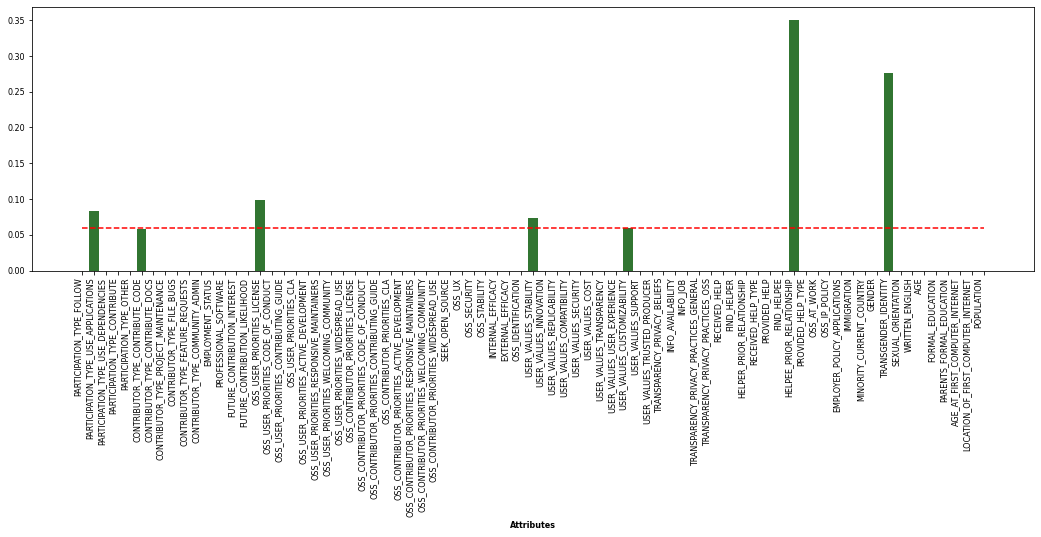

In [36]:
# plotting the attribute relavence
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '8'
plt.rcParams["figure.figsize"] = [14.50, 7.50]
#plt.rcParams["figure.autolayout"] = True
x2=len(list(decision_df3.columns.values))
x3 = x1[1:x2-1]

fig, ax = plt.subplots()
print(len(importance))
print(len(x3))
# plotting thresh hold line
ax.plot([0., len(x3)-1], [0.06, 0.06], "k--", color='red')

#plotting bar chart

plt.bar(x3,height= importance,color=(0.1, 0.4, 0.1, 0.9))

plt.setp(ax.xaxis.get_majorticklabels() , rotation=90, ha='right')



plt.xlabel('Attributes', fontweight='bold')
plt.show()


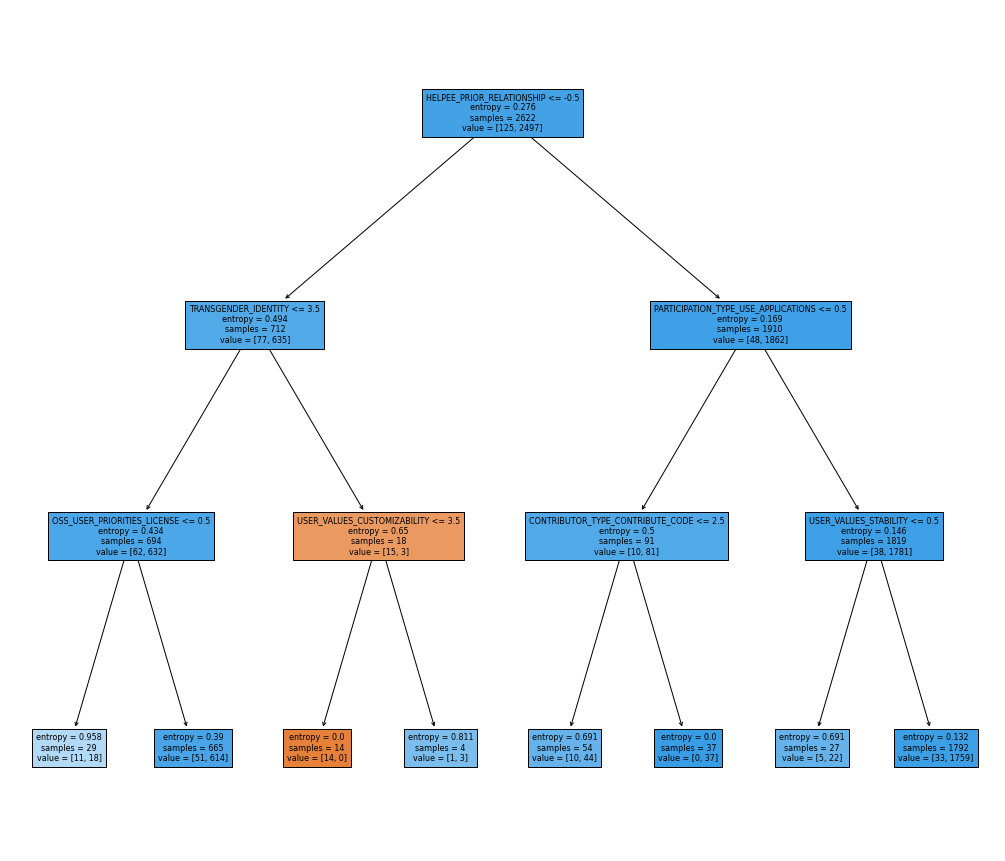

In [37]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [9.50, 6.50]
plt.rcParams["figure.autolayout"] = True

plt.figure(figsize=(14,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, feature_names = x3,fontsize=8,filled = True)
plt.show()


In [38]:

from sklearn.tree import export_text
r = export_text(clf, feature_names=list(X_train.columns))
print(r)



|--- HELPEE_PRIOR_RELATIONSHIP <= -0.50
|   |--- TRANSGENDER_IDENTITY <= 3.50
|   |   |--- OSS_USER_PRIORITIES_LICENSE <= 0.50
|   |   |   |--- class: 1
|   |   |--- OSS_USER_PRIORITIES_LICENSE >  0.50
|   |   |   |--- class: 1
|   |--- TRANSGENDER_IDENTITY >  3.50
|   |   |--- USER_VALUES_CUSTOMIZABILITY <= 3.50
|   |   |   |--- class: 0
|   |   |--- USER_VALUES_CUSTOMIZABILITY >  3.50
|   |   |   |--- class: 1
|--- HELPEE_PRIOR_RELATIONSHIP >  -0.50
|   |--- PARTICIPATION_TYPE_USE_APPLICATIONS <= 0.50
|   |   |--- CONTRIBUTOR_TYPE_CONTRIBUTE_CODE <= 2.50
|   |   |   |--- class: 1
|   |   |--- CONTRIBUTOR_TYPE_CONTRIBUTE_CODE >  2.50
|   |   |   |--- class: 1
|   |--- PARTICIPATION_TYPE_USE_APPLICATIONS >  0.50
|   |   |--- USER_VALUES_STABILITY <= 0.50
|   |   |   |--- class: 1
|   |   |--- USER_VALUES_STABILITY >  0.50
|   |   |   |--- class: 1



In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[   5   30]
 [   1 1088]]
              precision    recall  f1-score   support

           0       0.83      0.14      0.24        35
           1       0.97      1.00      0.99      1089

    accuracy                           0.97      1124
   macro avg       0.90      0.57      0.61      1124
weighted avg       0.97      0.97      0.96      1124



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

for i in range(3):
    print('n_estimator = ', i+3)
    clf_2 = RandomForestClassifier(n_estimators=i+3, random_state=100)
    clf_2.fit(X_train,y_train )
    RandomForestClassifier()
    y_rf_pred = clf_2.predict(X_test)
    y_rf_pred
    #RandomForestClassifier()
    accuracy_rf = accuracy_score(y_test, y_rf_pred)
    print('Accuracy = ',accuracy_rf)
    print(classification_report(y_test, y_rf_pred))

n_estimator =  3
Accuracy =  0.9617437722419929
              precision    recall  f1-score   support

           0       0.30      0.17      0.22        35
           1       0.97      0.99      0.98      1089

    accuracy                           0.96      1124
   macro avg       0.64      0.58      0.60      1124
weighted avg       0.95      0.96      0.96      1124

n_estimator =  4
Accuracy =  0.952846975088968
              precision    recall  f1-score   support

           0       0.25      0.26      0.25        35
           1       0.98      0.98      0.98      1089

    accuracy                           0.95      1124
   macro avg       0.61      0.62      0.61      1124
weighted avg       0.95      0.95      0.95      1124

n_estimator =  5
Accuracy =  0.9679715302491103
              precision    recall  f1-score   support

           0       0.45      0.14      0.22        35
           1       0.97      0.99      0.98      1089

    accuracy                           

In [41]:
# printing Summary of the results

print('FOR DECISION TREE WITH DEPTH SET AT 3')
print('\nAccuracy is ', metrics.accuracy_score(y_test, y_pred), ' Which is very high')
print('\nLooking at F score there is over fitting for value 1 in Behaviour model due to ist very high reatio')

#####################################

print('\nLook at part 2 of the same project where only 2 most prominent behavior attributes are set to 1 in behaviour column')

FOR DECISION TREE WITH DEPTH SET AT 3

Accuracy is  0.9724199288256228  Which is very high

Looking at F score there is over fitting for value 1 in Behaviour model due to ist very high reatio

Look at part 2 of the same project where only 2 most prominent behavior attributes are set to 1 in behaviour column
